In [3]:
import scvelo as scv
file = "mouseBM_with_velo.loom"
adata = scv.read_loom(file)

In [31]:
adata.layers['counts']

<13949x31053 sparse matrix of type '<class 'numpy.float64'>'
	with 43492399 stored elements in Compressed Sparse Row format>

In [43]:
adata

AnnData object with n_obs × n_vars = 13949 × 31053
    obs: 'ADT.weight', 'BM_pred', 'Blood_pred', 'Bone_pred', 'RNA.weight', 'id', 'nCount_ADT', 'nCount_RNA', 'nCount_ambiguous', 'nCount_spliced', 'nCount_unspliced', 'nFeature_ADT', 'nFeature_RNA', 'nFeature_ambiguous', 'nFeature_spliced', 'nFeature_unspliced', 'orig.ident', 'percent.mt', 'seurat_clusters', 'wsnn_res.1'
    layers: 'counts'

In [6]:
def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64))
    return out

In [57]:
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].apply(lambda x:int(x)-1)


In [58]:
import pandas as pd
import scanpy as sc
import numpy as np
df = grouped_obs_mean(adata,"seurat_clusters",layer="counts")
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000
mean,0.701832,0.358936,0.172003,0.178061,0.561356,0.322510,0.488894,0.217461,0.201342,0.183345,0.695363,0.409677,0.563878,0.330594,0.293585,0.134069,0.110759
std,5.561945,2.871550,1.526291,1.631476,4.591336,2.510392,4.075474,1.935883,1.768506,1.624011,5.495461,3.095934,4.481686,2.558215,2.352053,1.098341,0.972498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000555,0.000577,0.000632,0.000678,0.000720,0.000918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.146977,0.119446,0.072061,0.073220,0.149748,0.112948,0.125786,0.088689,0.065379,0.074355,0.158228,0.141593,0.155172,0.131926,0.106918,0.057971,0.029412
max,206.997781,106.377380,79.156131,82.052881,206.834413,96.589532,162.174843,87.760925,70.295691,79.157815,205.132911,113.057522,163.039409,98.395778,86.918239,81.246377,54.558824


In [37]:
import pandas as pd
import scanpy as sc
import numpy as np
df = grouped_obs_mean(adata,"seurat_clusters")
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000,31053.000000
mean,0.111278,0.104121,0.090432,0.090178,0.108218,0.104579,0.105812,0.095554,0.091159,0.090344,0.110238,0.111864,0.109446,0.110263,0.097339,0.083407,0.078213
std,0.331668,0.308956,0.282634,0.282645,0.323182,0.306855,0.318081,0.288905,0.290413,0.282901,0.327231,0.317773,0.325779,0.310546,0.291256,0.260777,0.275714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000163,0.000392,0.000548,0.000605,0.000280,0.000389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.052963,0.072597,0.070956,0.071056,0.064496,0.072224,0.061220,0.076035,0.058803,0.070213,0.056409,0.077711,0.066832,0.085833,0.072389,0.056719,0.038636
max,4.556719,4.549712,4.917982,4.905176,4.527708,4.562096,4.664457,4.783017,4.706195,4.864118,4.531457,4.486751,4.541118,4.482893,4.477006,5.353737,4.977858


In [13]:
lsk = pd.read_csv("mouse_bulk/LSK_WT_KO.csv")
lsk = lsk.groupby("Gene Name").sum()
hpc5 = pd.read_csv("mouse_bulk/HPC5.transcript.csv")
hpc5 = hpc5.groupby("Gene Name").sum()

In [14]:
hpc5

,1706785_MW112_HPC5_2_S87_L003.tpm,1706784_MW112_HPC5_1_S86_L003.tpm,1706788_MW112_2B9_2_S90_L003.tpm,1706787_MW112_2B9_1_S89_L003.tpm,1706789_MW112_2B9_3_S91_L003.tpm,1706786_MW112_HPC5_3_S88_L003.tpm
Gene Name,,,,,,
0610009B22Rik,42.808642,41.998308,36.919538,39.730317,36.252600,40.942100
0610010F05Rik,20.323006,23.847809,22.635607,23.302152,23.795424,21.146522
0610010K14Rik,45.698674,43.534070,47.308311,50.859842,45.940590,45.747843
0610012G03Rik,10.468700,10.248600,11.512000,12.960500,13.062100,10.346000
0610030E20Rik,20.346840,21.615014,22.891504,22.614768,22.847848,21.180368
...,...,...,...,...,...,...
mt-Nd3,2769.350000,2832.390000,3280.460000,3196.290000,3158.770000,2705.380000
mt-Nd4,1520.570000,1755.750000,1772.000000,1758.410000,1733.740000,1523.430000
mt-Nd4l,2770.920000,3688.910000,4022.320000,3653.230000,3917.860000,3054.830000


In [16]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Gene,,,,,,,,,,,,,,,,,
Xkr4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.001083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001083,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [20]:
overlap_index = list(set(df.index).intersection(hpc5.index).intersection(lsk.index))

In [21]:
overlap_index

['Lrrc4c',
 'Vmn1r194',
 'Iffo2',
 'Gm11554',
 'Gm6619',
 'Ankrd46',
 'Clec3a',
 'Dnajc14',
 'Olfr551',
 'Bloc1s2',
 'Plxna4',
 'Mapkapk2',
 'Snx19',
 'Rexo2',
 'Tspan11',
 'Pnldc1',
 'Crygb',
 'Ntng2',
 'Irs1',
 'Cradd',
 'Cyp2d11',
 'Cox4i2',
 'Ptprh',
 'Dpep2',
 'Rce1',
 'Ighd5-6',
 'Lman1',
 'Snx5',
 'Trav6n-7',
 'Ndor1',
 'Nrgn',
 'Prkag3',
 'Gldc',
 'E130116L18Rik',
 'P4ha3',
 'Rab36',
 'Snrnp48',
 'Smarcb1',
 'Zdhhc2',
 'Mras',
 'H2-M11',
 'Hist1h4m',
 'Igkv2-116',
 'F2',
 'Mcm5',
 'Abca1',
 'Capza1',
 'Impad1',
 'Krtap1-5',
 'Snapc4',
 'Ints3',
 'Dera',
 '4933412E24Rik',
 'Npc1l1',
 'Mtmr2',
 'BC031181',
 'Chmp7',
 'Gpx6',
 'Vmn1r56',
 'Angpt1',
 'Olfr600',
 'Gtpbp2',
 'Gm14124',
 'Gemin4',
 'Nme5',
 'Tmem88b',
 'Phf21b',
 'Nfkbil1',
 'Btnl10',
 'Sucnr1',
 'Gzme',
 'Rdh8',
 'Sry',
 '6430550D23Rik',
 'Fen1',
 'Kcnip2',
 'Olfr1098',
 'Rnf185',
 'Igkj4',
 'Olfr1231',
 'Psen2',
 'Qars',
 'Gm5152',
 'Irak1bp1',
 'Krt12',
 'Hist2h2ab',
 'Usp15',
 'Cldn3',
 'Frem1',
 'Tmprss11e',
 'Gm

In [39]:
df2 = pd.concat([df.loc[overlap_index],lsk.loc[overlap_index],hpc5.loc[overlap_index]],axis=1)
df2.head()

,1,2,3,4,5,6,7,8,9,10,...,2_KO.tpm,3_WT.tpm,4_WT.tpm,6_KO.tpm,1706785_MW112_HPC5_2_S87_L003.tpm,1706784_MW112_HPC5_1_S86_L003.tpm,1706788_MW112_2B9_2_S90_L003.tpm,1706787_MW112_2B9_1_S89_L003.tpm,1706789_MW112_2B9_3_S91_L003.tpm,1706786_MW112_HPC5_3_S88_L003.tpm
Lrrc4c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034836,0.056965,0.009003,0.175364,0.000000,0.000000,0.000000,0.260898,0.000000,0.000000
Vmn1r194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Iffo2,0.002773,0.029429,0.041719,0.032542,0.012959,0.011019,0.008805,0.033419,0.002972,0.033384,...,3.272669,2.341197,3.232747,2.727617,7.210353,7.700111,9.632808,9.259076,9.351439,7.660833
Gm11554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gm6619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
df2.loc[df2.index.str.contains("hb",case=False)]

,0,1,2,3,4,5,6,7,8,9,...,2_KO.tpm,3_WT.tpm,4_WT.tpm,6_KO.tpm,1706785_MW112_HPC5_2_S87_L003.tpm,1706784_MW112_HPC5_1_S86_L003.tpm,1706788_MW112_2B9_2_S90_L003.tpm,1706787_MW112_2B9_1_S89_L003.tpm,1706789_MW112_2B9_3_S91_L003.tpm,1706786_MW112_HPC5_3_S88_L003.tpm
Hba-a2,1.170272,0.00577,0.005057,0.005424,0.007919,0.026630,0.012579,0.647815,0.002972,0.009105,...,47.742000,48.13593,82.184456,85.0753,0.050349,0.0,0.0,0.162328,0.0,0.0
Hba-a1,3.177482,0.01558,0.010746,0.012203,0.009359,0.045914,0.038994,0.912596,0.004458,0.013657,...,16.263378,34.40851,32.565080,33.7722,0.000000,0.0,0.0,0.211423,0.0,0.0


In [69]:
df3 = pd.concat([lsk,hpc5],axis=1)

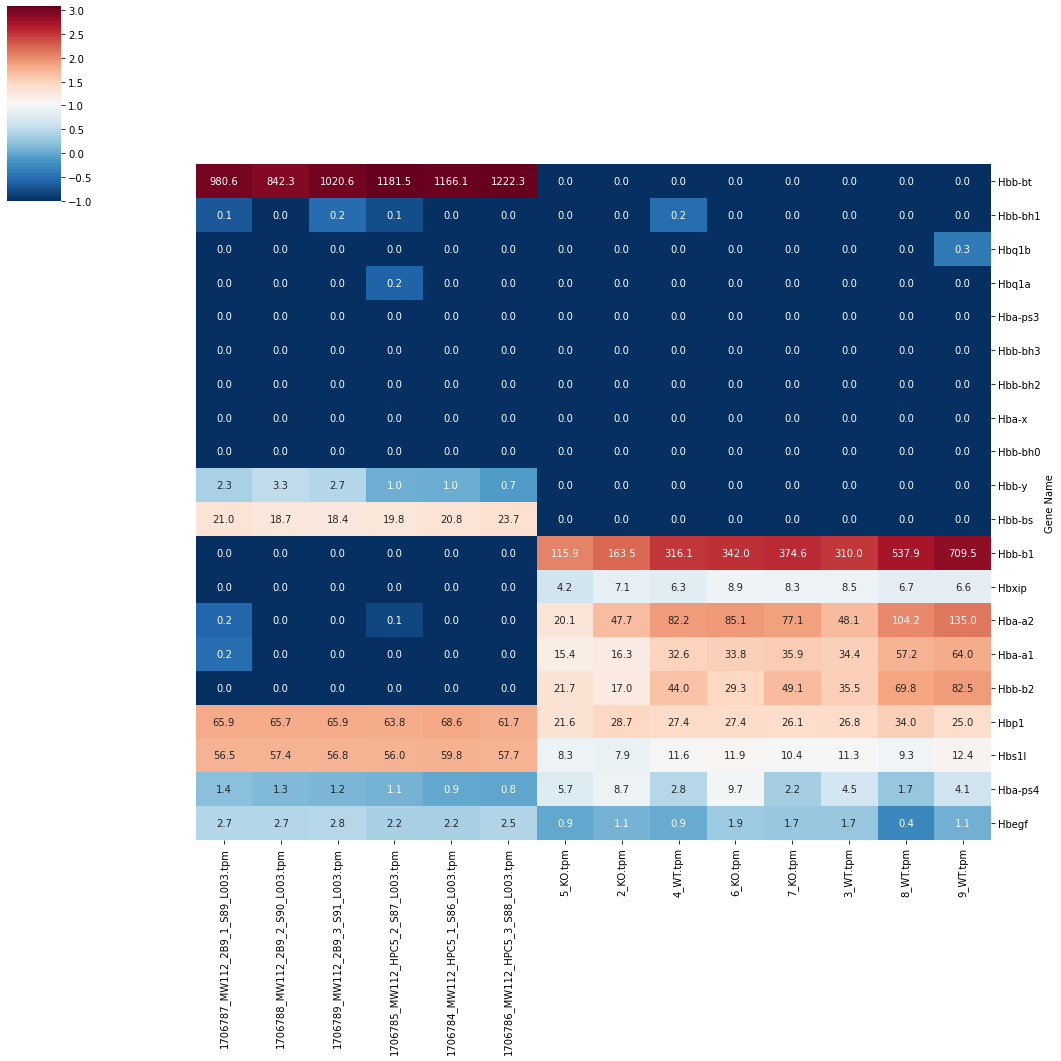

In [91]:

myPlot=sns.clustermap(df3.loc[df3.index.str.contains("Hb",case=True)].fillna(0).transform(lambda x:np.log10(x+0.1)),annot=df3.loc[df3.index.str.contains("Hb",case=True)].fillna(0),figsize=(15,15),fmt='.1f',cmap="RdBu_r")
myPlot.ax_row_dendrogram.set_visible(False)
myPlot.ax_col_dendrogram.set_visible(False)

In [42]:
df2.corr(method="spearman")

,1,2,3,4,5,6,7,8,9,10,...,2_KO.tpm,3_WT.tpm,4_WT.tpm,6_KO.tpm,1706785_MW112_HPC5_2_S87_L003.tpm,1706784_MW112_HPC5_1_S86_L003.tpm,1706788_MW112_2B9_2_S90_L003.tpm,1706787_MW112_2B9_1_S89_L003.tpm,1706789_MW112_2B9_3_S91_L003.tpm,1706786_MW112_HPC5_3_S88_L003.tpm
1,1.000000,0.938523,0.921317,0.919604,0.937367,0.945481,0.970078,0.923817,0.946422,0.921768,...,0.858104,0.870180,0.859976,0.863473,0.867512,0.866930,0.863400,0.869080,0.864905,0.867380
2,0.938523,1.000000,0.964010,0.954594,0.972897,0.965548,0.951414,0.954226,0.958040,0.961340,...,0.891235,0.901590,0.894865,0.896477,0.901325,0.901312,0.895131,0.902041,0.896821,0.901290
3,0.921317,0.964010,1.000000,0.978074,0.948084,0.962865,0.937343,0.974458,0.955140,0.979235,...,0.893401,0.898833,0.893137,0.896156,0.878271,0.878106,0.870831,0.879393,0.872733,0.878149
4,0.919604,0.954594,0.978074,1.000000,0.940639,0.963489,0.935657,0.981637,0.952921,0.975186,...,0.889353,0.892878,0.887377,0.891045,0.867405,0.866650,0.860216,0.870577,0.861723,0.866887
5,0.937367,0.972897,0.948084,0.940639,1.000000,0.956597,0.946488,0.942181,0.947809,0.946186,...,0.879052,0.889668,0.884005,0.885046,0.900923,0.900873,0.895487,0.901070,0.897662,0.900644
6,0.945481,0.965548,0.962865,0.963489,0.956597,1.000000,0.957856,0.968319,0.965333,0.961290,...,0.886690,0.895803,0.888468,0.890675,0.880188,0.880009,0.874295,0.882913,0.875826,0.880618
7,0.970078,0.951414,0.937343,0.935657,0.946488,0.957856,1.000000,0.939300,0.965382,0.940469,...,0.869071,0.880476,0.872169,0.874119,0.873095,0.873100,0.869513,0.874517,0.871059,0.874313
8,0.923817,0.954226,0.974458,0.981637,0.942181,0.968319,0.939300,1.000000,0.955658,0.973459,...,0.887570,0.892176,0.886420,0.889612,0.866137,0.865564,0.859532,0.869899,0.861221,0.866547
9,0.946422,0.958040,0.955140,0.952921,0.947809,0.965333,0.965382,0.955658,1.000000,0.957054,...,0.879163,0.889575,0.882244,0.883336,0.876039,0.877149,0.872648,0.876222,0.874627,0.877581
10,0.921768,0.961340,0.979235,0.975186,0.946186,0.961290,0.940469,0.973459,0.957054,1.000000,...,0.891354,0.896126,0.891029,0.893671,0.874109,0.874094,0.867591,0.874703,0.869481,0.874637


In [27]:
lsk.shape

(30120, 8)

In [44]:
!head top20.marker.tsv

"p_val" "avg_log2FC" "pct.1" "pct.2" "p_val_adj" "cluster" "gene"
"1" 0 2.57659788945418 0.987 0.295 0 "0" "Car1"
"2" 0 2.36323373310251 0.994 0.437 0 "0" "Blvrb"
"3" 0 2.33272853913884 0.984 0.339 0 "0" "C1qtnf12"
"4" 0 1.89434035788007 0.989 0.137 0 "0" "Ermap"
"5" 0 1.87788560114442 0.998 0.91 0 "0" "Prdx2"
"6" 0 1.79824207909735 0.999 0.817 0 "0" "Car2"
"7" 0 1.70345381651168 0.423 0.049 0 "0" "Hbb-bs"
"8" 0 1.64496856327758 0.988 0.438 0 "0" "Mt1"
"9" 0 1.5970672703987 0.979 0.307 0 "0" "Cpox"


In [47]:
marker = pd.read_csv("top20.marker.tsv",sep=" ",index_col=0)

In [48]:
marker.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
1,0.0,2.576598,0.987,0.295,0.0,0,Car1
2,0.0,2.363234,0.994,0.437,0.0,0,Blvrb
3,0.0,2.332729,0.984,0.339,0.0,0,C1qtnf12
4,0.0,1.894340,0.989,0.137,0.0,0,Ermap
5,0.0,1.877886,0.998,0.910,0.0,0,Prdx2


In [59]:
overlap_index = list(set(df.index).intersection(hpc5.index).intersection(lsk.index).intersection(marker.gene))
df2 = pd.concat([df.loc[overlap_index],lsk.loc[overlap_index],hpc5.loc[overlap_index]],axis=1)
df2.corr(method="pearson")

,0,1,2,3,4,5,6,7,8,9,...,2_KO.tpm,3_WT.tpm,4_WT.tpm,6_KO.tpm,1706785_MW112_HPC5_2_S87_L003.tpm,1706784_MW112_HPC5_1_S86_L003.tpm,1706788_MW112_2B9_2_S90_L003.tpm,1706787_MW112_2B9_1_S89_L003.tpm,1706789_MW112_2B9_3_S91_L003.tpm,1706786_MW112_HPC5_3_S88_L003.tpm
0,1.000000,0.133578,0.137083,0.155233,-0.004492,0.151086,0.917392,0.211118,0.466203,0.173860,...,0.119152,0.139956,0.054719,0.048903,-0.018021,-0.014085,-0.006352,-0.008048,-0.007358,-0.013020
1,0.133578,1.000000,0.556942,0.430029,0.794441,0.442830,0.228098,0.484694,0.469540,0.579388,...,0.323965,0.518867,0.344868,0.218968,0.638640,0.654965,0.647387,0.651230,0.651520,0.648657
2,0.137083,0.556942,1.000000,0.951885,0.263904,0.524454,0.186801,0.927315,0.409766,0.997345,...,0.540928,0.490121,0.295216,0.288192,0.563699,0.551916,0.557171,0.550348,0.553685,0.562056
3,0.155233,0.430029,0.951885,1.000000,0.203790,0.535828,0.188168,0.976947,0.413148,0.957605,...,0.536168,0.468411,0.278528,0.285304,0.548725,0.534713,0.540075,0.533002,0.536910,0.546134
4,-0.004492,0.794441,0.263904,0.203790,1.000000,0.259694,0.027799,0.236274,0.184740,0.280758,...,0.175623,0.340742,0.328279,0.205338,0.486727,0.507296,0.486887,0.497217,0.496052,0.502169
5,0.151086,0.442830,0.524454,0.535828,0.259694,1.000000,0.207284,0.635703,0.432604,0.539545,...,0.246276,0.312292,0.212579,0.151710,0.346052,0.339821,0.343115,0.341484,0.349070,0.335389
6,0.917392,0.228098,0.186801,0.188168,0.027799,0.207284,1.000000,0.259379,0.686880,0.230096,...,0.148297,0.184940,0.076442,0.070372,0.037181,0.039896,0.049043,0.046424,0.047434,0.040575
7,0.211118,0.484694,0.927315,0.976947,0.236274,0.635703,0.259379,1.000000,0.511938,0.940132,...,0.526263,0.484891,0.285807,0.286231,0.522235,0.510886,0.518327,0.511677,0.516690,0.519472
8,0.466203,0.469540,0.409766,0.413148,0.184740,0.432604,0.686880,0.511938,1.000000,0.453466,...,0.219484,0.266328,0.130169,0.114196,0.241560,0.237306,0.237143,0.235055,0.238584,0.234867
9,0.173860,0.579388,0.997345,0.957605,0.280758,0.539545,0.230096,0.940132,0.453466,1.000000,...,0.541914,0.502080,0.301240,0.290087,0.578395,0.567366,0.572611,0.566001,0.569301,0.577255


In [50]:
df2.corr(method="spearman")

,1,2,3,4,5,6,7,8,9,10,...,2_KO.tpm,3_WT.tpm,4_WT.tpm,6_KO.tpm,1706785_MW112_HPC5_2_S87_L003.tpm,1706784_MW112_HPC5_1_S86_L003.tpm,1706788_MW112_2B9_2_S90_L003.tpm,1706787_MW112_2B9_1_S89_L003.tpm,1706789_MW112_2B9_3_S91_L003.tpm,1706786_MW112_HPC5_3_S88_L003.tpm
1,1.000000,0.426701,0.336267,0.380299,0.414633,0.615114,0.938430,0.441172,0.715646,0.378997,...,0.367864,0.430349,0.375893,0.386737,0.141035,0.154188,0.167417,0.169313,0.162065,0.158085
2,0.426701,1.000000,0.707120,0.604997,0.895898,0.670487,0.543432,0.578507,0.635636,0.714421,...,0.615036,0.656109,0.658650,0.643661,0.668480,0.673571,0.694021,0.689151,0.688662,0.678129
3,0.336267,0.707120,1.000000,0.960216,0.525264,0.705389,0.443403,0.915293,0.658011,0.993401,...,0.786500,0.757776,0.750626,0.769825,0.480914,0.482015,0.498699,0.501651,0.496814,0.484659
4,0.380299,0.604997,0.960216,1.000000,0.434604,0.752378,0.470905,0.968306,0.679550,0.966607,...,0.772682,0.732386,0.720845,0.742874,0.384429,0.384774,0.400580,0.404443,0.399173,0.388029
5,0.414633,0.895898,0.525264,0.434604,1.000000,0.559674,0.477780,0.414756,0.495352,0.527500,...,0.538773,0.581515,0.608149,0.581979,0.719136,0.723136,0.738565,0.737038,0.735020,0.729655
6,0.615114,0.670487,0.705389,0.752378,0.559674,1.000000,0.699790,0.803532,0.836463,0.734062,...,0.630844,0.687836,0.656641,0.641412,0.325932,0.332175,0.351775,0.349891,0.349637,0.334744
7,0.938430,0.543432,0.443403,0.470905,0.477780,0.699790,1.000000,0.492719,0.854872,0.489518,...,0.408812,0.466391,0.403961,0.422488,0.217642,0.230300,0.247788,0.244603,0.241565,0.234228
8,0.441172,0.578507,0.915293,0.968306,0.414756,0.803532,0.492719,1.000000,0.694603,0.925115,...,0.775643,0.756665,0.742103,0.757895,0.336046,0.336912,0.353332,0.361211,0.352661,0.339884
9,0.715646,0.635636,0.658011,0.679550,0.495352,0.836463,0.854872,0.694603,1.000000,0.697994,...,0.524601,0.587644,0.531100,0.541895,0.298173,0.309059,0.332155,0.330684,0.325981,0.312375
10,0.378997,0.714421,0.993401,0.966607,0.527500,0.734062,0.489518,0.925115,0.697994,1.000000,...,0.780059,0.760699,0.749153,0.767055,0.466822,0.468315,0.485739,0.487671,0.483616,0.471044


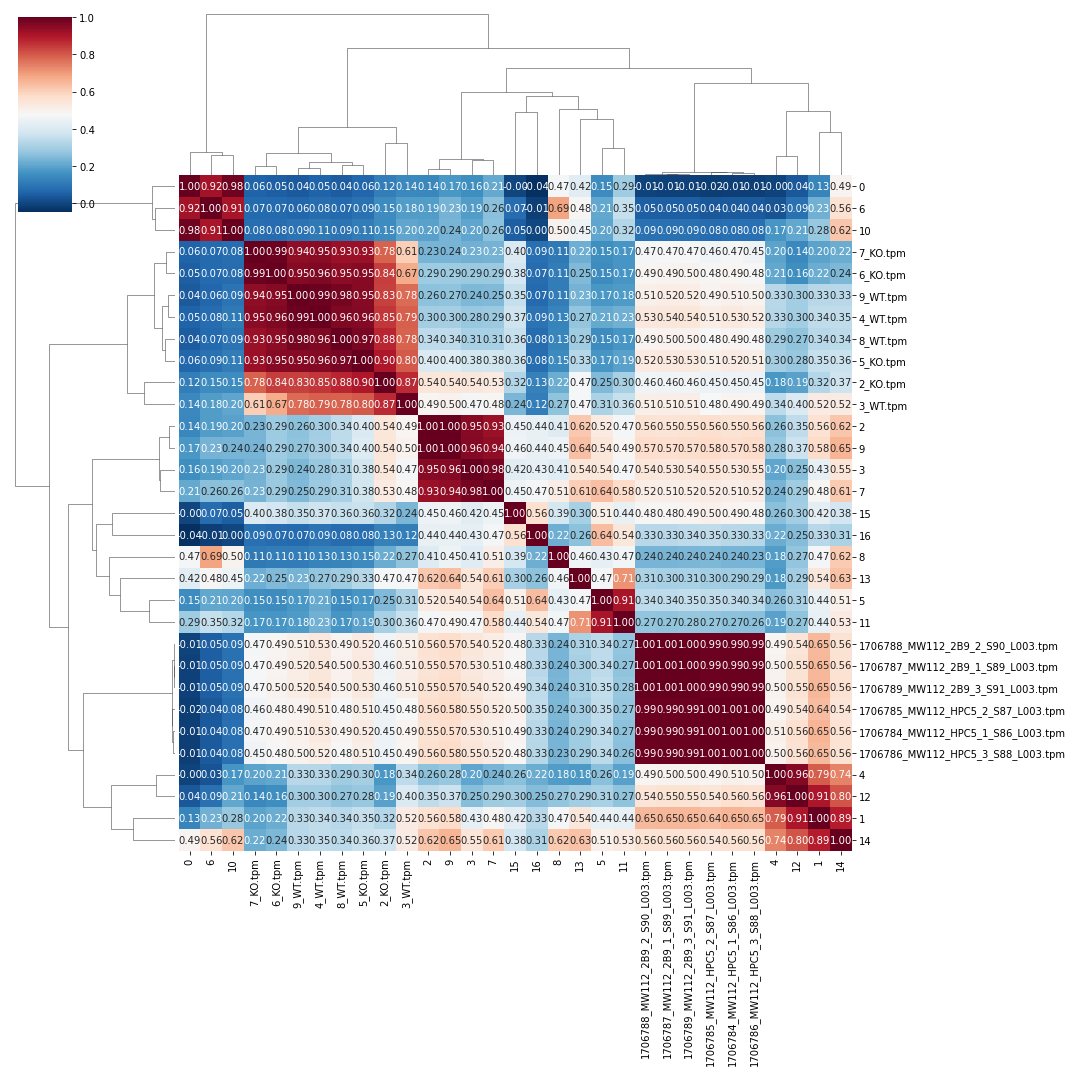

In [60]:
import seaborn as sns
sns.clustermap(df2.corr(method="pearson"),annot=True,figsize=(15,15),fmt='.2f',cmap="RdBu_r")

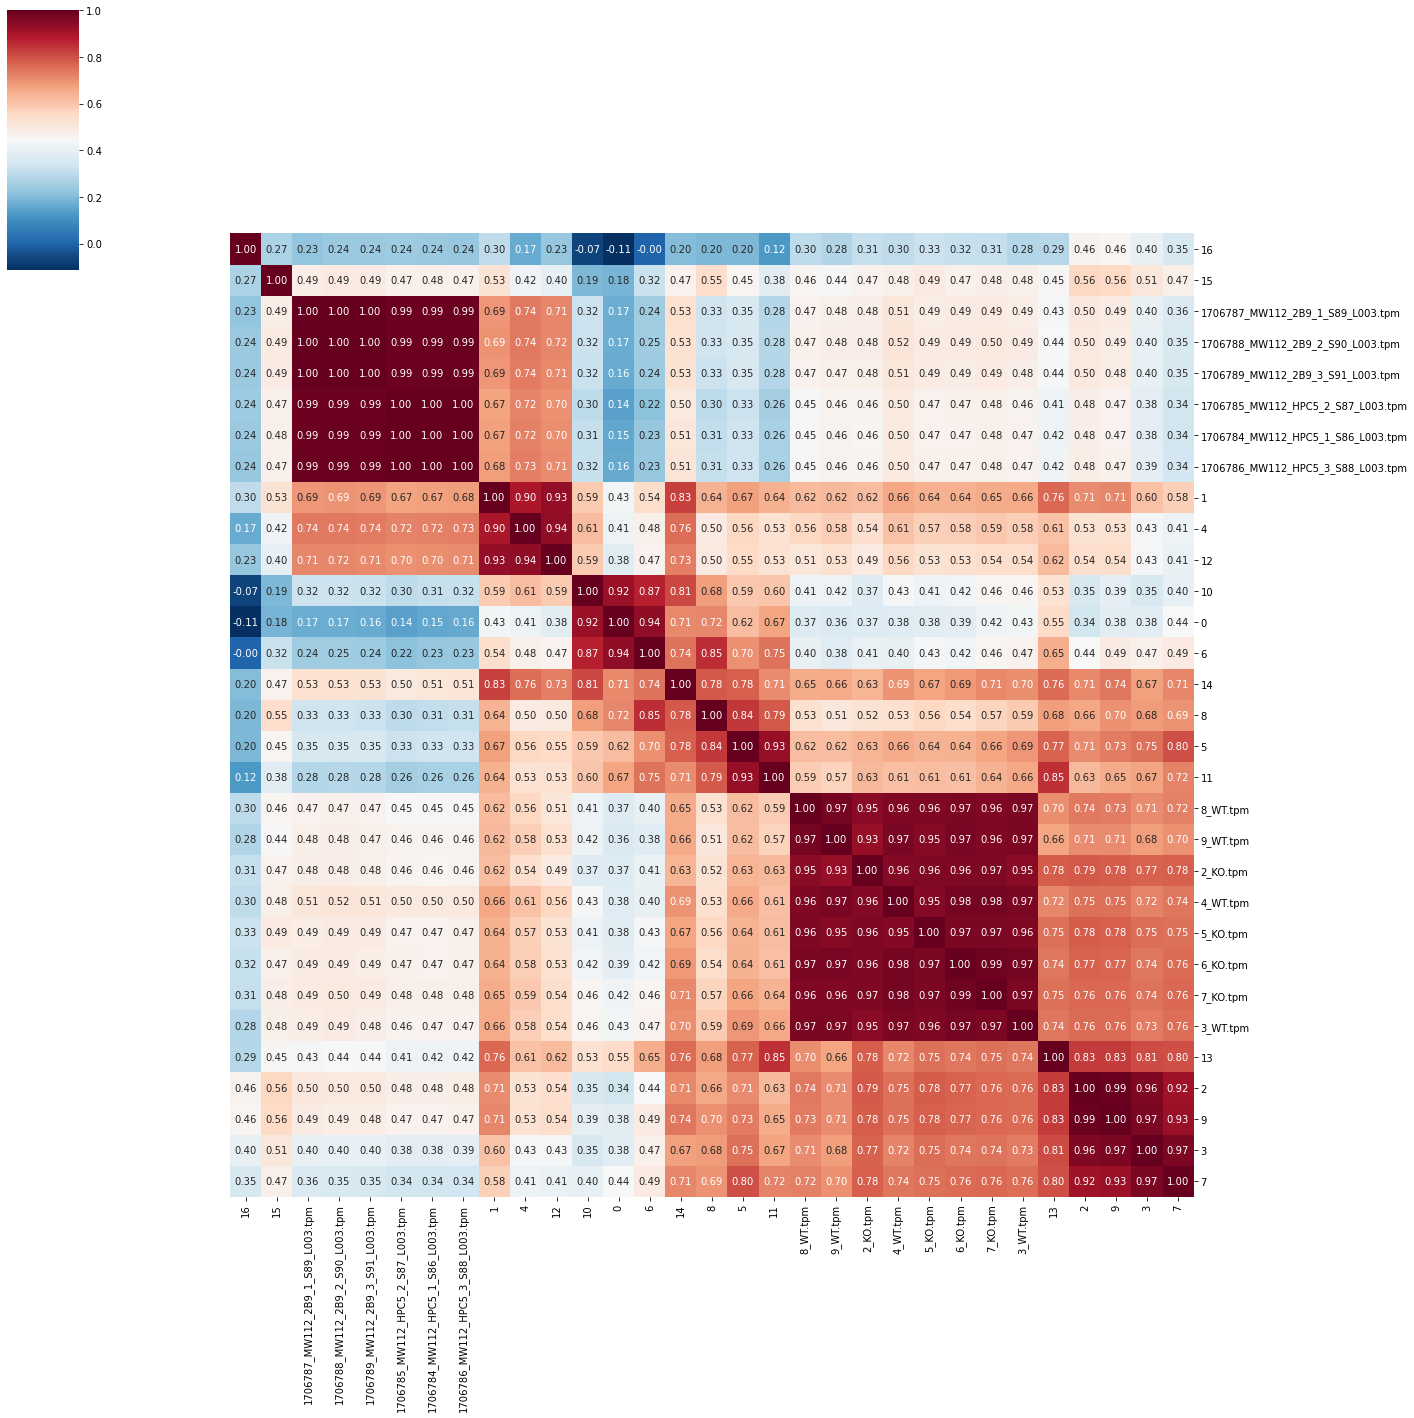

In [63]:
import seaborn as sns
myPlot=sns.clustermap(df2.corr(method="spearman"),annot=True,figsize=(20,20),fmt='.2f',cmap="RdBu_r")
myPlot.ax_row_dendrogram.set_visible(False)
myPlot.ax_col_dendrogram.set_visible(False)